In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [3]:
# Create a zip of latitude and longitude pairs 
lats = np.random.uniform(low = -90, high = 90, size = 1500)
lngs = np.random.uniform(low = -180, high = 180, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates: 
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
     # If the city is unique, then we will add it to the cities list.
    if city not in cities: 
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
# (using "enumerate() method will allow us to retrieve both the city name and the index from "city" list)
for i, city in enumerate(cities): 
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | sivas
Processing Record 4 of Set 1 | tandalti
Processing Record 5 of Set 1 | mehamn
Processing Record 6 of Set 1 | vila
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | arlit
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | sao joao da barra
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | san patricio
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | chapais
Processing Record 21 of Set 1 | hanmer springs
Processing Record 22 of Set 1 | severo-kuril

Processing Record 38 of Set 4 | belfast
Processing Record 39 of Set 4 | saint george
Processing Record 40 of Set 4 | tautira
Processing Record 41 of Set 4 | alice springs
Processing Record 42 of Set 4 | tayturka
Processing Record 43 of Set 4 | turukhansk
Processing Record 44 of Set 4 | clyde river
Processing Record 45 of Set 4 | harper
Processing Record 46 of Set 4 | andenes
Processing Record 47 of Set 4 | flinders
Processing Record 48 of Set 4 | longyearbyen
Processing Record 49 of Set 4 | lompoc
Processing Record 50 of Set 4 | itarema
Processing Record 1 of Set 5 | sibolga
Processing Record 2 of Set 5 | alofi
Processing Record 3 of Set 5 | ugoofaaru
Processing Record 4 of Set 5 | mount gambier
Processing Record 5 of Set 5 | thompson
Processing Record 6 of Set 5 | punta alta
Processing Record 7 of Set 5 | mudgee
Processing Record 8 of Set 5 | safaqis
City not found. Skipping...
Processing Record 9 of Set 5 | cherskiy
Processing Record 10 of Set 5 | xinxiang
Processing Record 11 of Set

Processing Record 23 of Set 8 | uusikaupunki
Processing Record 24 of Set 8 | jiangyou
Processing Record 25 of Set 8 | santa pola
Processing Record 26 of Set 8 | richards bay
Processing Record 27 of Set 8 | omsukchan
Processing Record 28 of Set 8 | caxito
Processing Record 29 of Set 8 | moree
Processing Record 30 of Set 8 | lasa
Processing Record 31 of Set 8 | flin flon
Processing Record 32 of Set 8 | grand-santi
Processing Record 33 of Set 8 | dongkan
Processing Record 34 of Set 8 | nuuk
Processing Record 35 of Set 8 | hashtrud
Processing Record 36 of Set 8 | puerto baquerizo moreno
Processing Record 37 of Set 8 | saint-georges
Processing Record 38 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 39 of Set 8 | straumen
Processing Record 40 of Set 8 | nome
Processing Record 41 of Set 8 | namibe
Processing Record 42 of Set 8 | mildura
Processing Record 43 of Set 8 | bastia
Processing Record 44 of Set 8 | fallon
Processing Record 45 of Set 8 | zaporizhzhya
Processing Re

Processing Record 13 of Set 12 | matagami
Processing Record 14 of Set 12 | poway
Processing Record 15 of Set 12 | sesheke
Processing Record 16 of Set 12 | eydhafushi
Processing Record 17 of Set 12 | pierre
Processing Record 18 of Set 12 | novyy urengoy
Processing Record 19 of Set 12 | vao
Processing Record 20 of Set 12 | menongue
Processing Record 21 of Set 12 | assen
Processing Record 22 of Set 12 | tomatlan
Processing Record 23 of Set 12 | wilmington
Processing Record 24 of Set 12 | zemio
Processing Record 25 of Set 12 | kuznechnoye
Processing Record 26 of Set 12 | salamiyah
Processing Record 27 of Set 12 | korla
Processing Record 28 of Set 12 | camana
Processing Record 29 of Set 12 | gambela
Processing Record 30 of Set 12 | byron bay
Processing Record 31 of Set 12 | khon buri
Processing Record 32 of Set 12 | quatre cocos
Processing Record 33 of Set 12 | khandyga
Processing Record 34 of Set 12 | calvia
Processing Record 35 of Set 12 | ye
City not found. Skipping...
Processing Record 

In [8]:
# Get the length of city_data to check it includes at least 500 cities 
len(city_data)

565

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,57.00,97,100,1.99,NZ,2021-03-02 18:19:26
1,Punta Arenas,-53.1500,-70.9167,59.00,36,0,13.80,CL,2021-03-02 18:18:53
2,Sivas,39.7916,37.0019,23.00,74,0,6.91,TR,2021-03-02 18:15:53
3,Tandalti,13.0167,31.8667,79.27,14,40,12.88,SD,2021-03-02 18:17:18
4,Mehamn,71.0357,27.8492,28.40,64,75,18.41,NO,2021-03-02 18:19:26
5,Vila,42.0304,-8.1588,51.01,83,75,3.76,PT,2021-03-02 18:19:27
6,Rikitea,-23.1203,-134.9692,77.58,69,46,1.68,PF,2021-03-02 18:17:55
7,Ushuaia,-54.8000,-68.3000,55.40,44,75,4.61,AR,2021-03-02 18:16:21
8,Kodiak,57.7900,-152.4072,28.40,69,1,9.22,US,2021-03-02 18:19:27
9,Butaritari,3.0707,172.7902,81.05,81,6,14.63,KI,2021-03-02 18:19:28


In [10]:
# Reorder the columns so they are easier to read 
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-03-02 18:19:26,-46.1927,168.8643,57.00,97,100,1.99
1,Punta Arenas,CL,2021-03-02 18:18:53,-53.1500,-70.9167,59.00,36,0,13.80
2,Sivas,TR,2021-03-02 18:15:53,39.7916,37.0019,23.00,74,0,6.91
3,Tandalti,SD,2021-03-02 18:17:18,13.0167,31.8667,79.27,14,40,12.88
4,Mehamn,NO,2021-03-02 18:19:26,71.0357,27.8492,28.40,64,75,18.41


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

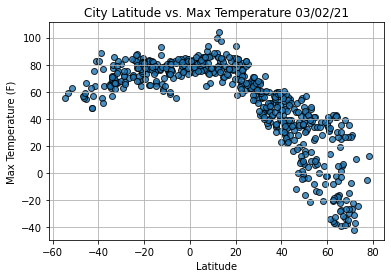

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

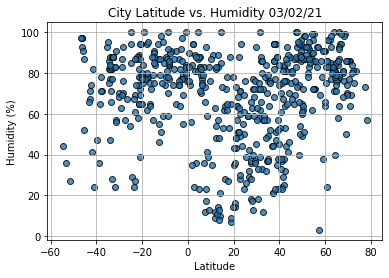

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

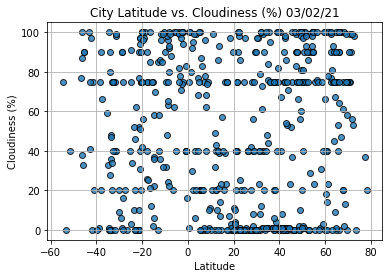

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


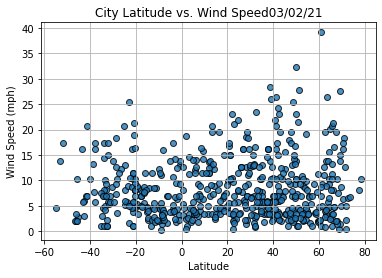

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats, 
            wind_speed, 
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [49]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Print linear regression r values
   
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"r value = {r_value}")

In [50]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

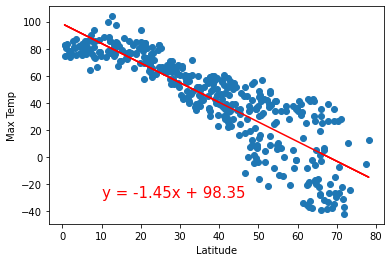

r value = -0.8618196596886132


In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(10,-30))

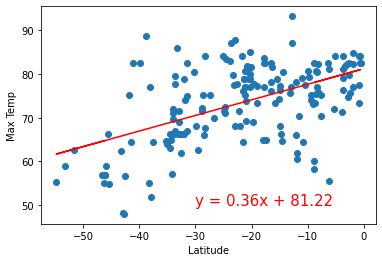

r value = 0.5213911502921769


In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-30,50))

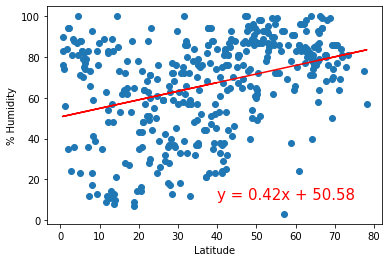

r value = 0.3503884590969224


In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

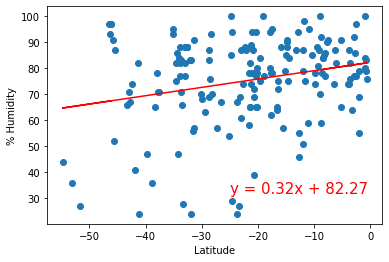

r value = 0.24798206643112927


In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-25,32))

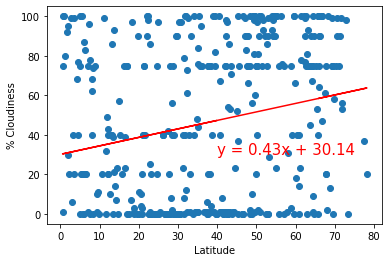

r value = 0.21873357175568964


In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,30))

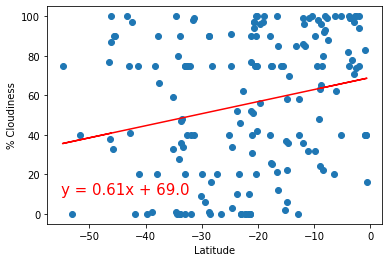

r value = 0.22714915755236853


In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,10))

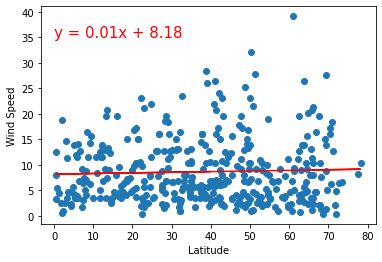

r value = 0.03901615541399402


In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,35))

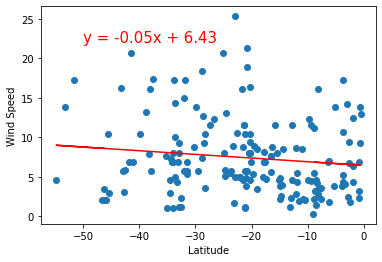

r value = -0.12383689630689719


In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,22))